In [81]:
from typing import List

In [2]:
# %load ../common_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from jlam.py_sql import PySql
import jlam.conn_constants as cnst
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core import debugger as dbg

%load_ext autoreload
%autoreload 2

# usage pandas_profiling.ProfileReport(df)
#import pandas_profiling ;

#bidata = PySql(cnst.SVR_BIEDW,cnst.DB_BI_DATA)
#biops = PySql(cnst.SVR_BIEDW,cnst.DB_BI_OPERATIONAL)
#sfdc = PySql(cnst.SVR_BIODS,cnst.DB_SFDC_DATA)

In [70]:
max_num = 6  # max # of Friends
num_friends = np.random.random_integers(1,max_num,100)

/Users/i846240/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  


In [71]:
# num_friends

In [72]:
from collections import Counter


In [73]:
friend_counts = Counter(num_friends)
xs = range(len(num_friends)+1)
ys = [friend_counts[x] for x in xs] # height is just # of friends

In [74]:
# list(friend_counts.elements())
max_height=friend_counts.most_common()[0][1]

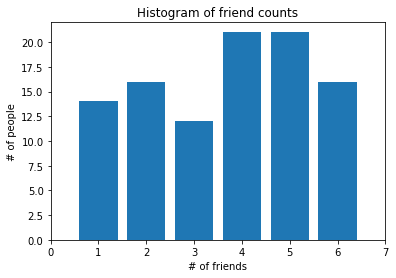

In [76]:
plt.bar(xs, ys)
plt.axis([0, max_num+1, 0, max_height+1])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [77]:
len(num_friends)

100

In [57]:
min(num_friends),max(num_friends)

(1, 25)

# Central Tendencies

In [86]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

# lst = [1,2,3,4,5,6]
print(np.mean(num_friends))
assert mean(num_friends)==np.mean(num_friends)

3.67


In [87]:
def _median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs) // 2]

In [93]:
def _median_even(xs: List[float]) -> float:
    ''' returns average of the middle two points'''
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [97]:
def median(xs: List[float]) -> float:
#     if len(xs) % 2 == 0:
#         return _median_even(xs)
#     else:
#         return _median_odd(xs)
    return _median_even(xs) if len(xs) % 2 == 0 else _median_odd(xs)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2



In [98]:
print(median(num_friends))

4.0


In [99]:
def quantile(xs: List[float], p: float) -> float:
    '''Returns the pth-percentile value in x'''
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [109]:
lst = np.arange(1,101)
assert quantile(lst,.25) == 26
assert quantile(lst,.50) == 51
assert quantile(lst,.75) == 76

In [110]:
for i in [.25, .50, .75]:
    print(quantile(num_friends,i))

2
4
5


In [113]:
def mode(xs: List[float]) -> List[float]:
    ''' returns the most common values
        returns a list, since there might be more than one mode
    '''
    counts = Counter(xs) # num_friends : occurances
    max_count = max(counts.values()) # most number of friends
    # loop through to see which ones has the max count
    return [x_i  for x_i, count in counts.items()
               if count==max_count]

In [115]:
lst = [1,2,2,3,3,4,5]
assert mode(lst)==[2,3]